In [47]:
import networkx as nx
from scipy.stats import pareto
import math, random
import matplotlib.pyplot as plt

n = 1000
us = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75,1,1.25, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5, 5.5]

def generate_positions(n, box_size=512):
    positions = []
    while len(positions) < n:
        x, y = random.uniform(1, box_size), random.uniform(1, box_size)
        positions.append((x, y))
    return {i: positions[i] for i in range(n)}


for i in range(1, 11): 
    for u in us:
        print(f"\nGenerating for μ={u} ...")

        def p_dist(r):
            if r < 1: 
                return 1 
            return u * ((r)**(-(1 + u)))
        G = None
        numnodes = 0
        kregular = False
        while kregular == False or G == None or not nx.is_connected(G): 
            print("loop")
            G = nx.Graph()
            pos = generate_positions(n, box_size=32)
            G.add_nodes_from(pos)
            
            for i0, (x0,y0) in pos.items(): 
                for i1, (x1, y1) in pos.items(): 
                    dist = math.dist((x0,y0), (x1, y1))
                    if dist < 1: 
                        G.add_edge(i0,i1)
            
            for i0, (x0,y0) in pos.items(): 
                while (G.degree[i0] < 4): 
                    nodes = list(pos.items())
                    random.shuffle(nodes)
                    for i1, (x1,y1) in nodes: 
                        dist = math.dist((x0,y0), (x1, y1))
                        prob = p_dist(dist)
                        rn = random.random() 
                        if rn < prob: 
                            G.add_edge(i0,i1)
            print("trying k regular")
            try: 
                G = nx.k_factor(G, 4)
                print("k reguar is true")
                kregular = True
            except nx.NetworkXException:
                print("kregular is false")
                kregular = False

        print("out2")
        for i0, (x0,y0) in pos.items():
            if G.degree(i0) !=4: 
                print("uh oh")
            
        print("Graph generated:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

        # --- Calculate average edge distance ---
        total_distance = 0.0
        for u_edge, v_edge in G.edges():
            x1, y1 = pos[u_edge]
            x2, y2 = pos[v_edge]
            total_distance += math.dist((x1, y1), (x2, y2))
        
        avg_distance = total_distance / G.number_of_edges() if G.number_of_edges() > 0 else float('nan')
        print(f"Average edge distance for μ={u}: {avg_distance:.4f}")

        # --- Optional: Save and visualize ---
        nx.write_edgelist(G, f"graphs/random_geometric_{u}_{i}.txt", data=False)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx(G, pos, node_size=20, with_labels=False, alpha=0.7, edge_color="red")
        plt.title(f"Random Geometric Graph (μ={u})")
        plt.show()



Generating for μ=0.75 ...
loop
trying k regular
kregular is false
loop
trying k regular
kregular is false
loop
trying k regular
kregular is false
loop
trying k regular
kregular is false
loop
trying k regular
kregular is false
loop
trying k regular
kregular is false
loop
trying k regular


KeyboardInterrupt: 

In [1]:
import networkx as nx
from scipy.stats import pareto
import math, random
import matplotlib.pyplot as plt

n = 1000
us = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75,1,1.25, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5, 5.5]


def generate_positions(n, box_size=512):
    positions = []
    while len(positions) < n:
        x, y = random.uniform(1, box_size), random.uniform(1, box_size)
        positions.append((x, y))
    return {i: positions[i] for i in range(n)}

def generate_graph(u): 
    def p_dist(r):
        if r < 1: 
            return 1 
        return u * ((r)**(-(1 + u)))
    G = nx.Graph()
    pos = generate_positions(n, box_size=32)
    for i0, (x0,y0) in pos.items(): 
        for i1, (x1, y1) in pos.items(): 
            dist = math.dist((x0,y0), (x1, y1))
            if dist < 1 and i0 != i1: 
                G.add_edge(i0,i1)
    nodes = list(pos.items())

    while G.number_of_edges() < 4000: 
        i0, (x0, y0) = random.choice(nodes)
        i1, (x1, y1) = random.choice(nodes)
        dist = math.dist((x0,y0), (x1, y1))
        prob = p_dist(dist) 
        rn = random.random() 
        if rn < prob and i0 != i1: 
            G.add_edge(i0,i1)
    return G

for i in range(1, 11): 
    for u in us:
        print(f"\nGenerating for μ={u} ...")
        G = generate_graph(u)
        while(not nx.is_connected(G)): 
              G = generate_graph(u)        

        print("Graph generated:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

        # --- Optional: Save and visualize ---
        nx.write_edgelist(G, f"graphs/random_geometric_{u}_{i}.txt", data=False)


Generating for μ=0.1 ...


KeyboardInterrupt: 

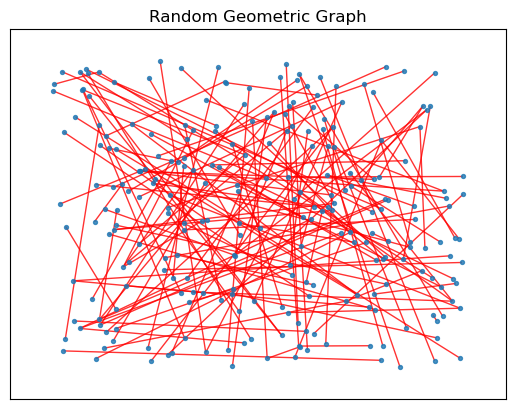

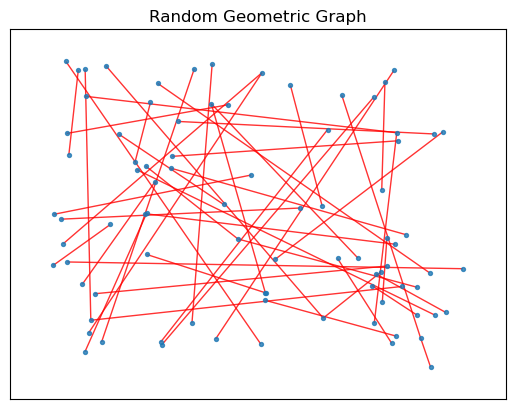

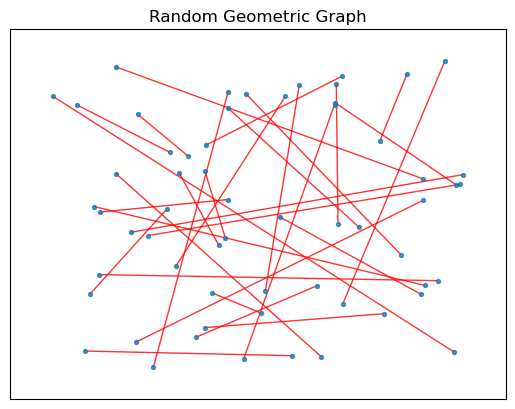

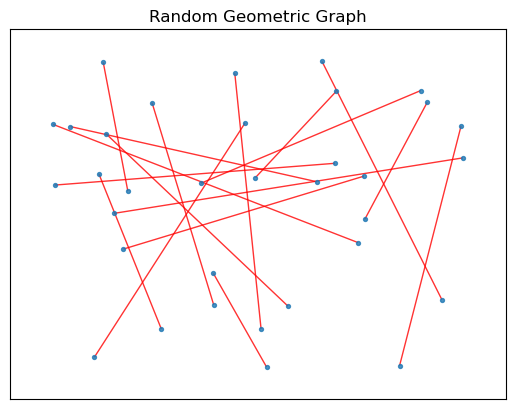

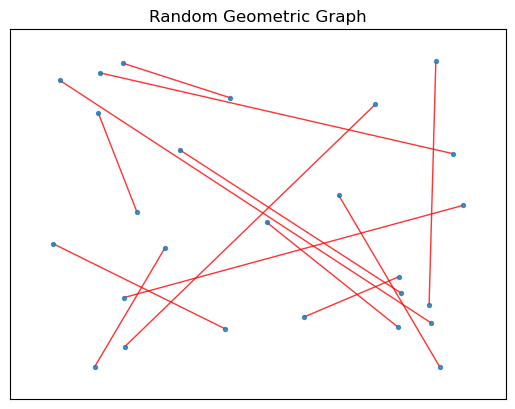

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math, random

def generate_positions(n, box_size=512):
    positions = []
    while len(positions) < n:
        x, y = random.uniform(1, box_size), random.uniform(1, box_size)
        positions.append((x, y))
    return {i: positions[i] for i in range(n)}

us = [0.5, 1.5, 2.0, 3.0, 5.5]
for u in us: 
    pos = generate_positions(1000, box_size=512)
    G = nx.read_edgelist(f"graphs/random_geometric_{u}.txt", nodetype=int)
    nx.draw_networkx(G, pos, node_size=8, with_labels=False, alpha=0.8, edge_color = "red") 
    plt.title("Random Geometric Graph")
    plt.show()

In [1]:
import networkx as nx
from scipy.stats import pareto
import os
import matplotlib.pyplot as plt

us = []
#mus = [10 ** -8, 10 ** -7, 10 ** -6, 10 ** -5]
os.makedirs("graphs", exist_ok=True)
n = 10000

for u in us:
    def p_dist(distance):
        r = max(1, distance)
        return u * (r*10)**(-(1+u))
    G = nx.soft_random_geometric_graph(n, radius = 1, p_dist = p_dist)
    pos = nx.get_node_attributes(G, 'pos')
    print('graph generated')
    sum_of_degrees = sum(dict(G.degree()).values())
    num_nodes = G.number_of_nodes()
    average_degree = sum_of_degrees / num_nodes
    print(u, average_degree)
    nx.write_edgelist(G, "graphs/random_geometric_" + str(u) + ".txt", data=False)
    plt.figure(figsize=(8, 8)) # Optional: set figure size
    nx.draw_networkx(G, pos, node_size=80, with_labels=False, alpha=0.8, edge_color = "red") 
    plt.title("Random Geometric Graph")
    plt.show()


In [ ]:
import networkx as nx

n = 2520 * 512
for i in range (0,100): 
    G = nx.random_geometric_graph(n, i/100000)
    sum_of_degrees = sum(dict(G.degree()).values())
    num_nodes = G.number_of_nodes()
    average_degree = sum_of_degrees / num_nodes
    nx.write_edgelist(G, "graphs/geometric" + str(i) + ".txt", data=False)